# Maze Generators

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from collections import OrderedDict, deque, defaultdict, namedtuple
from itertools import product
from math import sqrt, pi, sin, cos
from random import random, randint, choice, shuffle
import os
from IPython.display import display, clear_output, Image, HTML
import ipywidgets as widgets
import numpy as np
import matplotlib
import matplotlib.animation
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from drawing import VectorImage

-----

# A) Pefect Maze on Square Grid using DFS

Process: start with all edges, then destroy them using random DFS from any point (backtrack from dead ends, don't create loops).

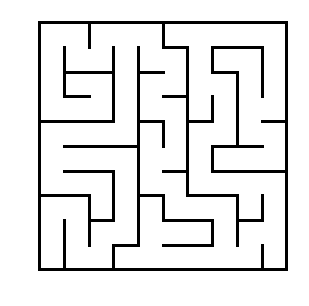

In [38]:
# Originat at bottom-left corner.
# Directions: right, up, left, down.
DIRS = [(1, 0), (0, 1), (-1, 0), (0, -1)]

def create_perfect_maze(size):
    maze = create_full_maze(size)
    destroy_walls_dfs(maze)
    draw_maze(maze)

def create_full_maze(size):
    return {(x, y): [True] * 4
            for x in range(size) for y in range(size)}
        
def destroy_walls_dfs(maze, visited=None, start=(0, 0)):
    visited = visited or set()
    visited.add(start)
    order = list(range(4))
    shuffle(order)
    for i in order:
        neighbor = move(start, DIRS[i])
        if neighbor in maze and neighbor not in visited:
            maze[start][i] = False
            maze[neighbor][(i+2)%4] = False
            destroy_walls_dfs(maze, visited, neighbor)

def move(point, d):
    return (point[0] + d[0], point[1] + d[1])

def draw_maze(maze, linewidth=3, **kwargs):
    shifts = [(1, 0), (1, 1), (0, 1), (0, 0)]
    im = VectorImage()
    for point, walls in maze.items():
        for i, is_wall in enumerate(walls):
            if is_wall:
                p1 = move(point, shifts[i])
                p2 = move(point, shifts[(i+1)%4])
                im.line(p1, p2, linewidth=linewidth, **kwargs)
    return im

create_perfect_maze(10)

-----

# B) Braid Maze

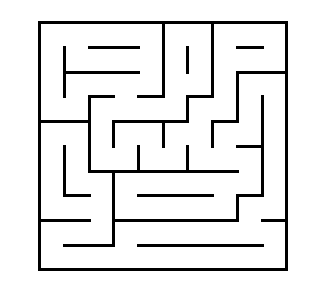

In [81]:
def create_braid_maze(size):
    maze = create_empty_maze(size)
    add_wall_for_each_crossing(maze, size)   
    # Only take 1 vertical and 1 horizontal direction for uniequeness.
    candidates = {
        (cell, i) for cell in maze for i, d in enumerate(DIRS[:2])
        if (move(cell, d) in maze)}
    while candidates:
        cell, i_dir = choice(list(candidates))
        candidates.remove((cell, i_dir))
        add_wall_if_safe(maze, cell, i_dir)
    draw_maze(maze)
    
def add_wall_for_each_crossing(maze, size):
    for x in range(1, size):
        for y in range(1, size):
            add_wall_from_crosssing(maze, x, y)
            
def add_wall_from_crosssing(maze, x, y):
    shifts = [(0, -1), (0, 0), (-1, 0), (-1, -1)]
    order = list(range(4))
    shuffle(order)
    for i in order:
        cell = move((x, y), shifts[i])
        i_dir = (i+1) % 4
        if maze[cell][i_dir]:
            return
        if add_wall_if_safe(maze, cell, i_dir):
            return
    
def add_wall_if_safe(maze, cell, i_dir):
    direction = DIRS[i_dir]
    neighbor = move(cell, direction)
    if count_directions(maze, cell) < 3:
        return False
    if count_directions(maze, neighbor) < 3:
        return False
    add_wall(maze, cell, i_dir)
    if not is_reachable(maze, cell, neighbor):
        remove_wall(maze, cell, i_dir)
        return False
    return True

def create_empty_maze(size):
    maze = {(x, y): [False] * 4
            for x in range(size) for y in range(size)}
    for i in range(size):
        maze[(size-1, i)][0] = True
        maze[(i, size-1)][1] = True
        maze[(0, i)][2] = True
        maze[(i, 0)][3] = True
    return maze

def count_directions(maze, cell):
    return sum(int(not maze[cell][d]) for d in range(4))

def is_reachable(maze, start, end, visited=None):
    if start == end:
        return True
    visited = visited or set()
    visited.add(start)
    for i_dir, d in enumerate(DIRS):
        neighbor = move(start, d)
        is_wall = maze[start][i_dir]
        if is_wall or  neighbor in visited:
            continue        
        if is_reachable(maze, neighbor, end, visited=visited):
            return True
    return False            
            
def add_wall(maze, cell, i_dir):
    set_wall(maze, cell, i_dir, value=True)

def remove_wall(maze, cell, i_dir):
    set_wall(maze, cell, i_dir, value=False)

def set_wall(maze, cell, i_dir, value):
    maze[cell][i_dir] = value
    neighbor = move(cell, DIRS[i_dir])
    maze[neighbor][(i_dir+2)%4] = value   
    
create_braid_maze(10)